# Linear Regression

## Relation between ucs and point load


In [4]:
import pandas as pd
from pandas import read_excel 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel('Correlation.xlsx')

In [7]:
x=df["U"]
y=df["S"]

Text(0.5,1,'UCS Vs Point load')

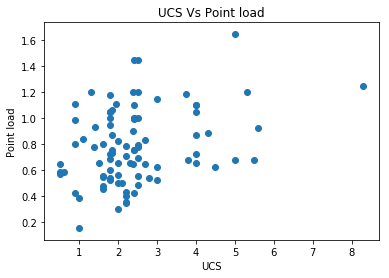

In [8]:
plt.scatter(x,y)
plt.xlabel("UCS")
plt.ylabel("Point load")
plt.title("UCS Vs Point load")

In [9]:
df.describe()

,U,S
count,89.000000,89.000000
mean,2.425281,0.786169
std,1.293966,0.287351
min,0.500000,0.150000
25%,1.790000,0.566000
50%,2.200000,0.750000
75%,2.500000,1.000000
max,8.300000,1.650000


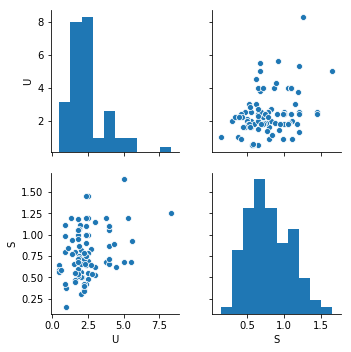

In [10]:
sns.pairplot(df)

/Users/athulyagk/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


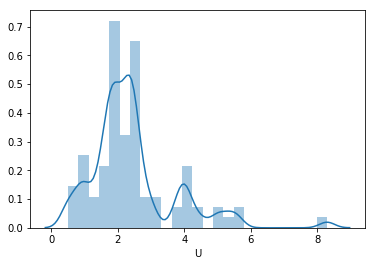

In [11]:
sns.distplot(x)

/Users/athulyagk/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


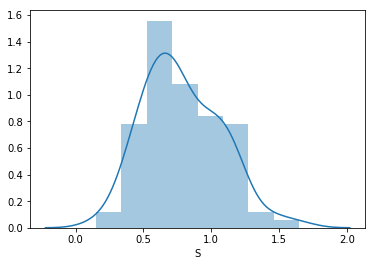

In [12]:
sns.distplot(y)

In [13]:
df.corr()

,U,S
U,1.000000,0.326896
S,0.326896,1.000000


In [14]:
import math
import numpy as np
u_sqrt= np.sqrt(x)
df["u_sqrt"]=u_sqrt
df.corr()

,U,S,u_sqrt
U,1.000000,0.326896,0.980693
S,0.326896,1.000000,0.322362
u_sqrt,0.980693,0.322362,1.000000


In [15]:
from sklearn.linear_model import LinearRegression
x= df[["S"]]
y=df["u_sqrt"]



Coefficients: 
 [0.35372138]
Mean squared error: 0.16
Variance score: -0.10


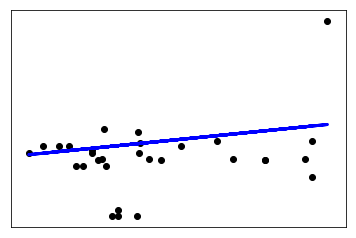

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score



# Split the data into training/testing sets
X_train = x[:-30]
X_test = x[-30:]

# Split the targets into training/testing sets
y_train = y[:-30]
y_test = y[-30:]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()